# <font color="#3A8C56">CLUSTERING MUSIC GENRES

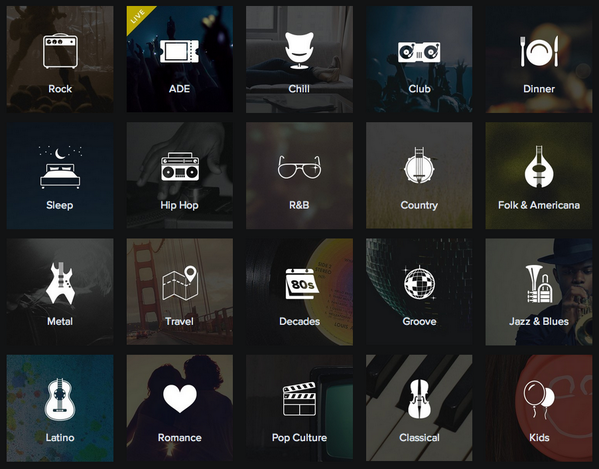

## <font color="#3A8C56"> Aim
The aim of this project is to perform clustering on a dataset of music tracks in order to group similar genres based on various audio features. By applying machine learning clustering techniques, we will identify patterns in music genres, considering features such as beats per minute (BPM), energy, danceability, loudness, liveness, and more. This analysis will help in understanding the underlying characteristics that define different music genres and can be used for recommendation systems, music analysis, and genre classification.

## <font color="#3A8C56"> Dataset Overview

The dataset contains music tracks from various artists, with features related to the audio characteristics of each song. The features include attributes such as **BPM**, **energy**, **danceability**, **loudness**, and more. The goal is to cluster these songs based on these attributes and explore relationships between the audio features and music genres.

| Column Name               | Description                                                                 |
|---------------------------|-----------------------------------------------------------------------------|
| **Title**                 | Name of the song/track.                                                     |
| **Artist**                | Name of the artist performing the song.                                      |
| **Top Genre**             | Primary genre of the song (e.g., rock, pop, hip-hop, etc.).                  |
| **Year**                  | Year the song was released.                                                  |
| **Beats Per Minute (BPM)**| Tempo of the song, measured in beats per minute.                             |
| **Energy**                | A measure of intensity and activity in the song (higher values indicate more energy). |
| **Danceability**          | A measure of how suitable a track is for dancing based on tempo, rhythm stability, etc. |
| **Loudness (dB)**         | The overall loudness of the song in decibels.                               |
| **Liveness**              | A measure of the presence of a live audience, indicating if the song sounds live. |
| **Valence**               | Describes the musical positiveness conveyed by a song (higher values indicate more positive emotions). |
| **Length (Duration)**     | Duration of the song in seconds.                                            |
| **Acousticness**          | A measure of the degree of acoustic sound in the track (higher values mean more acoustic). |
| **Speechiness**           | A measure of the presence of spoken words in a track.                        |
| **Popularity**            | Popularity of the song, usually a score between 0 and 100.                  |

## <font color="#3A8C56"> Requirements

In [232]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import dendrogram, linkage
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',None)
from scipy.cluster.hierarchy import dendrogram,linkage
import plotly.express as px

## <font color="#3A8C56"> Import Data

In [7]:
df=pd.read_csv("Spotify-2000.csv")

In [19]:
df=df.drop("Index",axis=1)

## <font color="#3A8C56"> EDA (Exploratory Data Analysis)

In [22]:
df.head()

,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [24]:
df.shape

(1994, 14)

In [26]:
df.isnull().sum()

Title                     0
Artist                    0
Top Genre                 0
Year                      0
Beats Per Minute (BPM)    0
Energy                    0
Danceability              0
Loudness (dB)             0
Liveness                  0
Valence                   0
Length (Duration)         0
Acousticness              0
Speechiness               0
Popularity                0
dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Title                   1994 non-null   object
 1   Artist                  1994 non-null   object
 2   Top Genre               1994 non-null   object
 3   Year                    1994 non-null   int64 
 4   Beats Per Minute (BPM)  1994 non-null   int64 
 5   Energy                  1994 non-null   int64 
 6   Danceability            1994 non-null   int64 
 7   Loudness (dB)           1994 non-null   int64 
 8   Liveness                1994 non-null   int64 
 9   Valence                 1994 non-null   int64 
 10  Length (Duration)       1994 non-null   object
 11  Acousticness            1994 non-null   int64 
 12  Speechiness             1994 non-null   int64 
 13  Popularity              1994 non-null   int64 
dtypes: int64(10), object(4)
memory usage: 218.2+ KB


In [178]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,1994.0,1992.992979,16.116048,1956.0,1979.00,1993.0,2007.00,2019.0
Beats Per Minute (BPM),1994.0,120.215647,28.028096,37.0,99.00,119.0,136.00,206.0
Energy,1994.0,59.679539,22.154322,3.0,42.00,61.0,78.00,100.0
Danceability,1994.0,53.238215,15.351507,10.0,43.00,53.0,64.00,96.0
Loudness (dB),1994.0,-9.008526,3.647876,-27.0,-11.00,-8.0,-6.00,-2.0
Liveness,1994.0,19.012036,16.727378,2.0,9.00,12.0,23.00,99.0
Valence,1994.0,49.408726,24.858212,3.0,29.00,47.0,69.75,99.0
Length (Duration),1994.0,262.443330,93.604387,93.0,212.00,245.0,289.00,1412.0
Acousticness,1994.0,28.858074,29.011986,0.0,3.00,18.0,50.00,99.0
Speechiness,1994.0,4.994985,4.401566,2.0,3.00,4.0,5.00,55.0


## <font color="#3A8C56"> Data Visualization

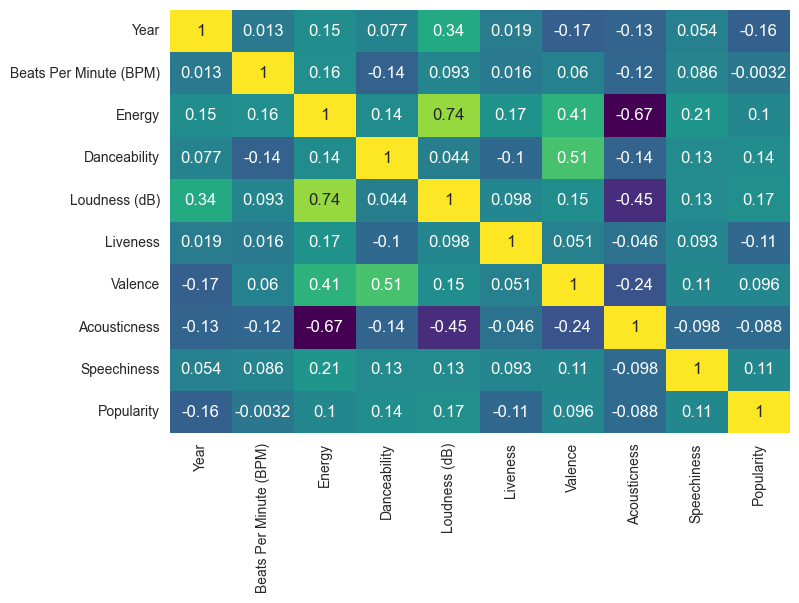

In [42]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cbar=False,cmap="viridis");

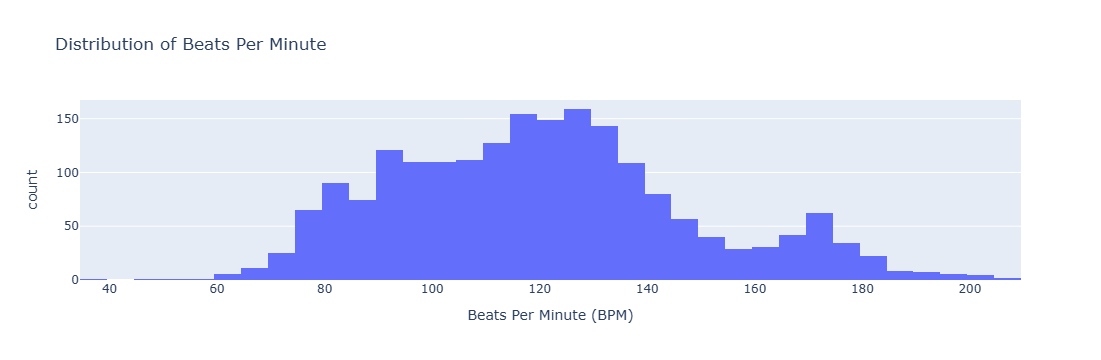

In [359]:
fig = px.histogram(df, x="Beats Per Minute (BPM)", title="Distribution of Beats Per Minute")
fig.show()

## <font color="#3A8C56"> Modelling

In [70]:
df["Length (Duration)"]=df["Length (Duration)"].str.replace(",","").astype(int)

In [196]:
x=df[["Beats Per Minute (BPM)", "Loudness (dB)", "Liveness", "Valence", "Acousticness", "Speechiness","Length (Duration)"]]

In [198]:
from sklearn.preprocessing import MinMaxScaler
for i in x.columns:
    MinMaxScaler(i)

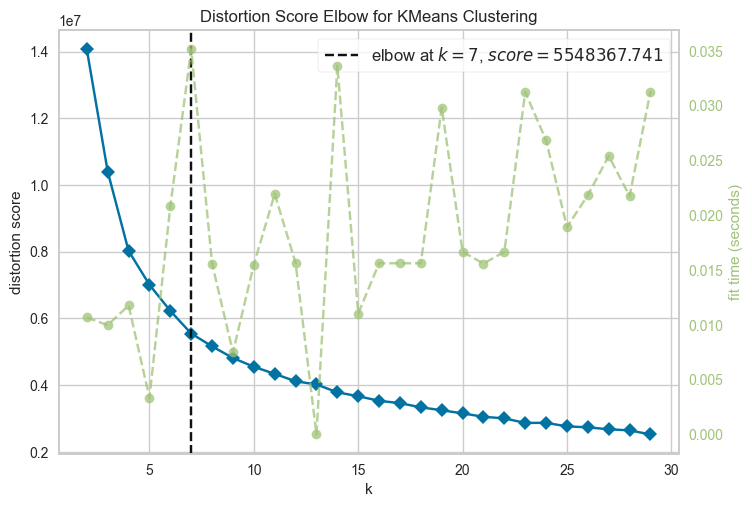

In [280]:
km=KMeans()
vis=KElbowVisualizer(km,k=(2,30))
vis.fit(x)
vis.show();

In [282]:
model=KMeans(7)
model=model.fit(x)
predicted=model.predict(x)

In [284]:
silhouette_score(x,predicted)

0.219555637754227

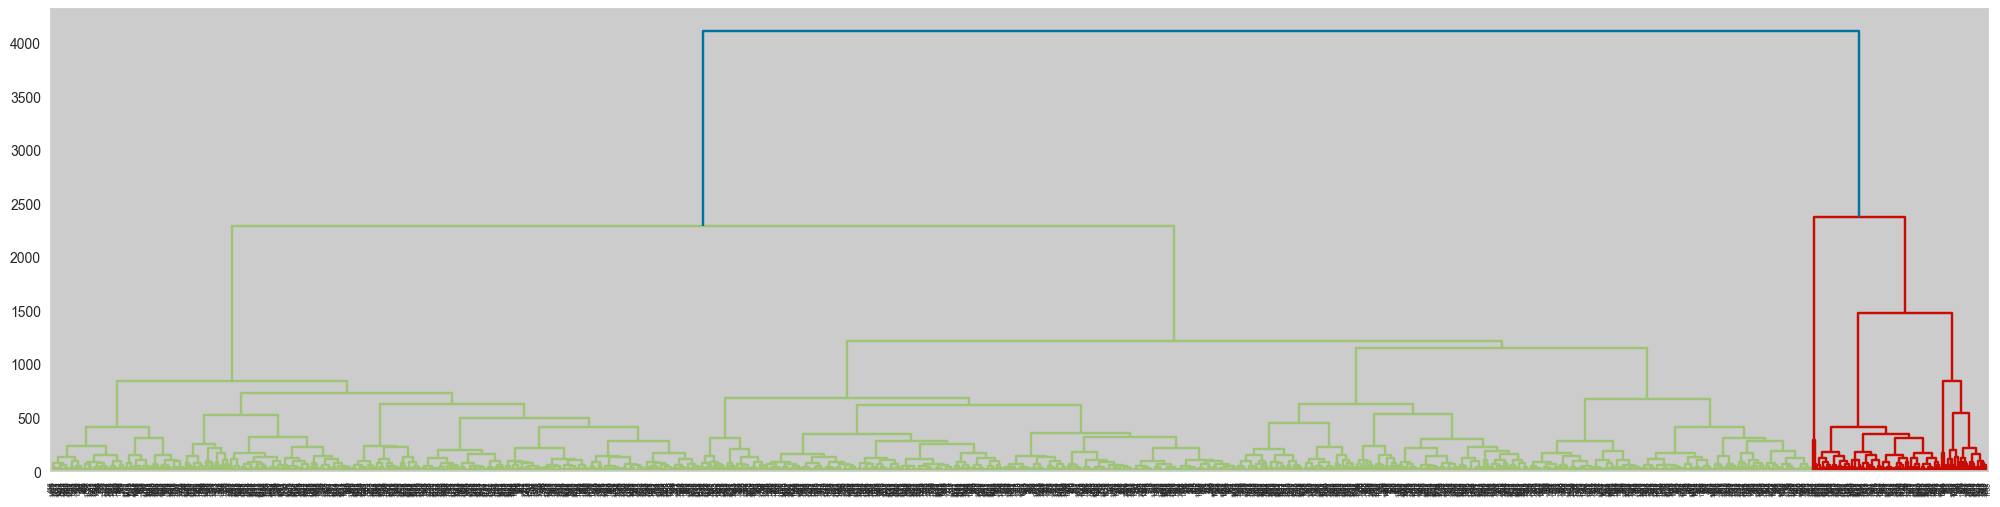

In [286]:
data=linkage(x,method='ward',metric='euclidean')
plt.figure(figsize=(25,6))
dendrogram(data);

In [340]:
df["Music Cluster"]=predicted

In [342]:
df["Music Cluster"].value_counts()

Music Cluster
4    653
6    473
0    344
5    322
3    157
1     40
2      5
Name: count, dtype: int64

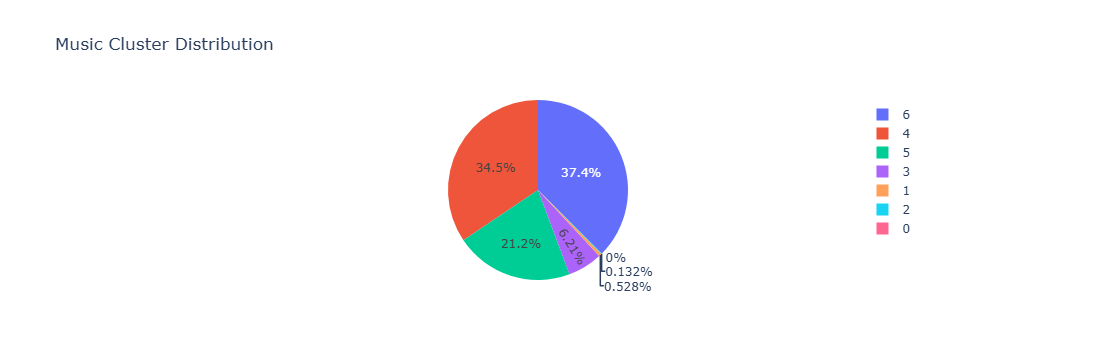

In [344]:
fig = px.pie(df, values="Music Cluster", names='Music Cluster', title='Music Cluster Distribution')
fig.show()

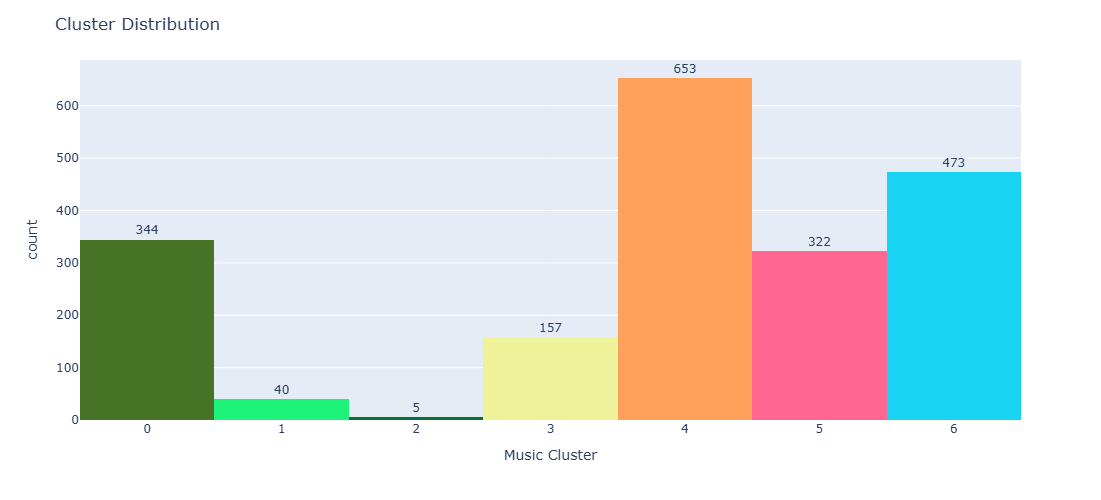

In [350]:

fig = px.histogram(df, x="Music Cluster",color="Music Cluster",color_discrete_map=color_map)
fig.update_traces(texttemplate='%{y}', textposition='outside')
fig.update_layout(
    title="Cluster Distribution",
    showlegend=False,  
    width=1200,  
    height=500   
)
fig.update_xaxes(tickvals=[0, 1, 2, 3,4,5,6,7])
fig.show()

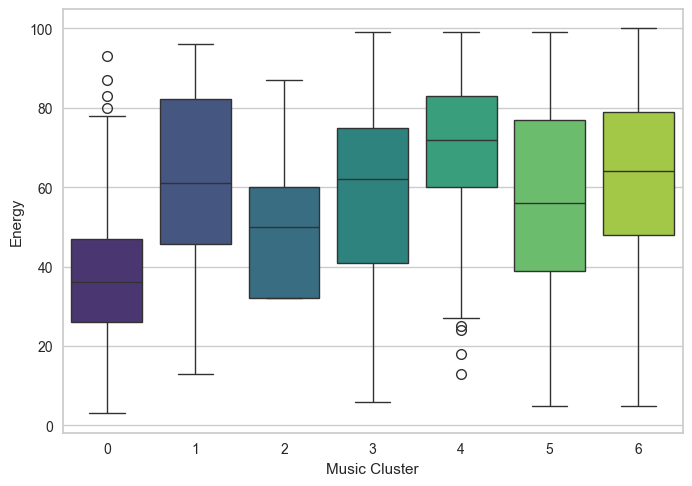

In [376]:
sns.boxplot(x="Music Cluster", y="Energy", data=df,palette="viridis");

<Axes: xlabel='Music Cluster', ylabel='Loudness (dB)'>

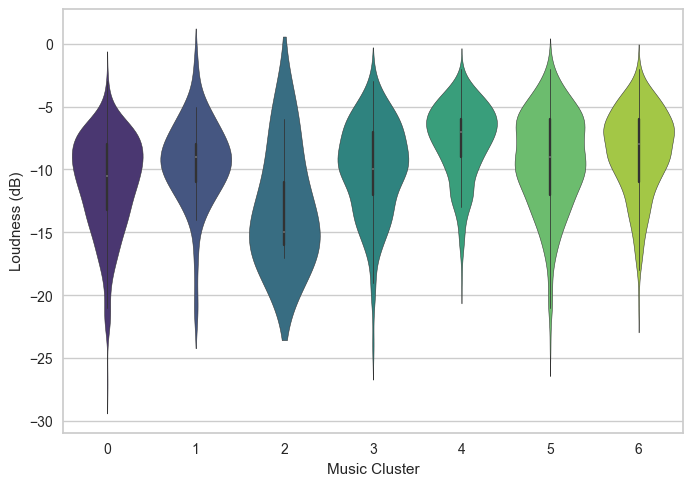

In [378]:
sns.violinplot(x="Music Cluster", y="Loudness (dB)", data=df,palette="viridis")

## <font color="#3A8C56"> Results

After applying the K-Means clustering algorithm to the music dataset, we divided the data into **7 clusters**. The silhouette score for this clustering model is **0.21**, indicating that the clusters are weakly separated. A silhouette score closer to 1 would imply well-separated clusters, while a score closer to 0 suggests overlapping clusters. Although the clustering model is functional, the low silhouette score suggests that there may be significant overlap between the clusters or that the clustering method could be further optimized.

From the distribution, we observe that **Cluster 4** has the highest number of songs (653), while **Cluster 2** has only 5 songs. The small size of Cluster 2 suggests that it may represent a very specific group of songs with unique features that distinguish them from the rest.

### <font color="#3A8C56">Interpretation
The clustering results show that some clusters, such as Cluster 4 and Cluster 6, contain a large number of songs, while others, such as Cluster 1 and Cluster 2, are sparsely populated. This indicates that the algorithm may not have perfectly captured the relationships between the features for all genres, as some clusters are underrepresented.